In [17]:

import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.express as px 
import seaborn as sns

In [18]:
df = pd.read_csv('covid_worldwide.csv')

In [19]:
df.columns

Index(['Serial Number', 'Country', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Total Test', 'Population'],
      dtype='object')

In [20]:
df.head(7)

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
5,6,Japan,"32,588,442","68,399","21,567,425","10,952,618","92,144,639","125,584,838"
6,7,S. Korea,"30,197,066","33,486","29,740,877","422,703","15,804,065","51,329,899"


In [21]:
df.tail(5)

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN
230,231,Tokelau,5,NaN,NaN,5,NaN,"1,378"


In [22]:
df.drop('Serial Number', axis=1)

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...
226,Diamond Princess,712,13,699,0,NaN,NaN
227,Vatican City,29,NaN,29,0,NaN,799
228,Western Sahara,10,1,9,0,NaN,"626,161"
229,MS Zaandam,9,2,7,0,NaN,NaN


In [23]:
df.isna().sum() # checks if there are any Null values in the dataframe

Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

In [24]:
df=df.dropna() # deletes if there are any Null values in the dataframe

In [25]:
df['Total Deaths']=df['Total Deaths'].str.replace(',', '', regex=True).astype(int)
df['Total Cases']=df['Total Cases'].str.replace(',', '', regex=True).astype(int)

In [26]:
fig = px.scatter_geo(df, locations='Country',locationmode="country names",scope="world",color="Total Cases",size="Total Cases",size_max=15,title="Covid-19 Cases Around the World",color_continuous_scale="Viridis_r")
fig.show()


In [27]:
fig = px.scatter_geo(df, locations='Country',locationmode="country names",scope="world",color="Total Deaths",size="Total Deaths",size_max=25,title="Covid-19 Deaths Around the World",template='plotly_dark')
fig.show()

Text(0.5, 1.0, 'Top 10 Countries with Total Cases')

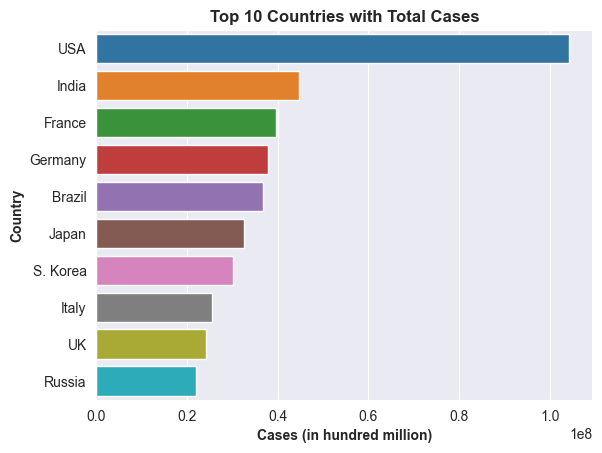

In [37]:
# Countries with total cases

country_case = df[['Country', 'Total Cases']]

country_case_plot = country_case.sort_values('Total Cases', ascending=False).head(10)

ccplot = sns.barplot(x='Total Cases', y='Country', data=country_case_plot)
ccplot.set_ylabel('Country', fontweight='bold')
ccplot.set_xlabel('Cases (in hundred million)', fontweight='bold')
ccplot.set_title('Top 10 Countries with Total Cases', fontweight='heavy')


AttributeError: module 'matplotlib' has no attribute 'xlabel'

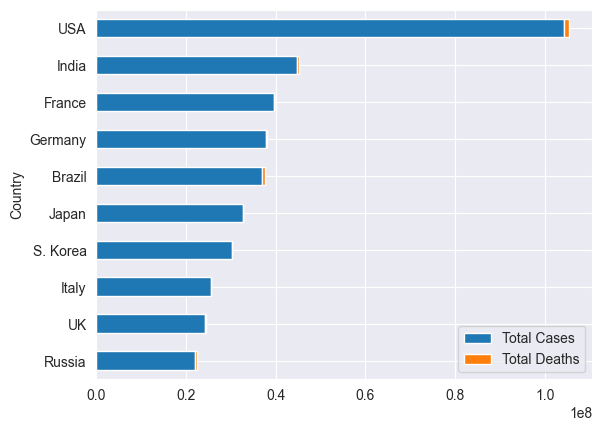

In [41]:
# Top 10 Countries with the most Covid Cases and The amount of people who recovered

case_death = df[['Country', 'Total Cases', 'Total Deaths']]

case_death_df = case_death.head(10)

case_death_df.sort_values('Total Cases').plot(x='Country', kind='barh', stacked=False)

# plt.title("Top 10 Countries with the Most Covid Case & The Amount Of deaths", weight='heavy', fontsize='x-large')
plt.xlabel("Cases (in hundred millions)", weight='bold')
plt.ylabel("Country", weight='bold')

plt.legend(['Total Cases', 'Cases Recovered'])

plt.show()